### AIR Jordan Classifier Project:

The dataset used is one from kaggle and can be found at the following link:   [https://www.kaggle.com/shreykavi/air-jordans-retro-121?select=21](https://)

The dataset is in a zip file format with each type of Jordan in its own folder. The zip file has been uploaded onto our google drive and will be loaded into colab from there.

Data Loading:

In [ ]:
import time
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/AJ DATA(1).zip' -d '/root/datasets'

Streaming output truncated to the last 5000 lines.
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_14.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_15.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_16.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_17.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_18.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_19.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_2.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_20.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_3.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_4.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_5.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_6.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_7.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Quai-54_8.jpg  
  in

In [ ]:
# define training and test data directories
data_dir = '/root/datasets'

# classes are folders in each directory with these names
classes = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
           '20', '21', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
# load and transform data using ImageFolder

# resize all images to 600 x 600
#data_transform = transforms.Compose([transforms.RandomResizedCrop(600),
                                      #transforms.ToTensor()])
#data_transform = transforms.Compose([transforms.CenterCrop(224),
                                      #transforms.ToTensor()])
data_transform = transforms.Compose([transforms.Resize((600,600),interpolation=2),
                                           transforms.ToTensor()])

dataset = datasets.ImageFolder(data_dir, transform=data_transform)

# print out some data stats
print('Num images: ', len(dataset))


'''#Trying to only use working images. Didnt work for RAM reasons. Fuck
workinglist=[]
notworkinglist=[]
workingdata=[]
z=0
for i in range(len(dataset)):
    try:
        workinglist.append((i,dataset[i][1]))
        workingdata.append(dataset[i])
    except:
        notworkinglist.append(i)
        pass
        z+=1'''


# Prepare Dataloader
batch_size = 32
num_workers = 1
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)


Num images:  10012


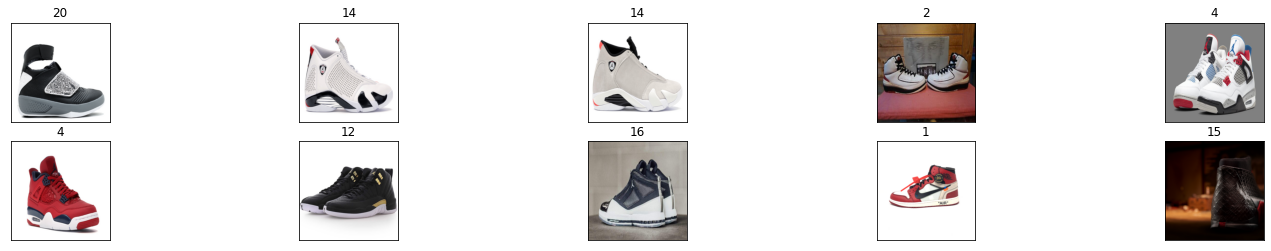

In [ ]:
# Verification Step - obtain one batch of images and visualize


dataiter = iter(data_loader)
#Following while loop and try catch is so that the iterator keeps repeating until
#it finds a combo of 10 images that don't raise an error
z=0
while z<1:
  try:
      images, labels = dataiter.next()
      images = images.numpy() # convert images to numpy for display
      z+=1
  except:
      pass

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
      ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      ax.set_title(classes[labels[idx]])

#IMPORTANT NOTE
#THE ABOVE DOES NOT SPLIT THE DATA
#Labels are wrong on the shoes....

Quick Note: Based on the above images, there is gonna have to be some pre-processing where we center the shoe somehow. 400 x 400 size seemed too small as there was a lot of shoes being cut out. 600 x 600 seems reasonable but there are definitely images that are smaller

In [ ]:
#it looks like it fails in multiple places
#Fails on the 51st image, when I went to the dataset on our drive, this images preview wasnt on there
#Seems like it may be an issue where some images from the dataset are corrupted or just not being loaded right
#Tried both the zip file and the folders in the drive and both give this error at the same point which starts at shoe 50
for idx, (data, image) in enumerate(dataset):
    print(idx)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


UnidentifiedImageError: ignored

In [ ]:
#z is the number of images that dont work,
#length of workinglist is the number of images that do
workinglist=[]
notworkinglist=[]
z=0
for i in range(len(dataset)):
    try:
        workinglist.append((i,dataset[i][1]))
        #workinglist.append(dataset[i])
    except:
        notworkinglist.append(i)
        pass
        z+=1

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
#First index matches where we know it falls apart first
print(z)
print(len(notworkinglist))
print(notworkinglist)

641
641
[51, 53, 57, 59, 61, 63, 65, 66, 68, 71, 73, 75, 79, 81, 83, 88, 95, 100, 103, 122, 132, 134, 149, 167, 188, 191, 199, 201, 203, 218, 220, 224, 226, 227, 241, 310, 332, 347, 351, 359, 361, 363, 365, 367, 411, 418, 423, 431, 435, 437, 442, 444, 446, 448, 457, 459, 496, 527, 529, 588, 593, 599, 631, 633, 640, 642, 669, 707, 709, 711, 713, 719, 721, 734, 784, 789, 790, 792, 794, 823, 825, 831, 851, 878, 880, 882, 887, 891, 893, 895, 902, 916, 960, 966, 974, 1014, 1016, 1020, 1024, 1026, 1036, 1040, 1042, 1069, 1071, 1075, 1088, 1091, 1106, 1108, 1110, 1112, 1117, 1119, 1154, 1157, 1163, 1167, 1180, 1181, 1219, 1234, 1237, 1240, 1242, 1246, 1277, 1286, 1290, 1292, 1293, 1303, 1305, 1307, 1353, 1427, 1470, 1484, 1503, 1506, 1509, 1530, 1532, 1543, 1553, 1555, 1559, 1561, 1563, 1566, 1573, 1617, 1621, 1630, 1634, 1636, 1638, 1643, 1648, 1676, 1834, 1912, 1914, 1916, 1918, 1921, 1924, 1980, 1982, 1984, 1989, 1995, 1998, 2007, 2009, 2044, 2056, 2058, 2084, 2122, 2141, 2144, 2146, 2148,

In [ ]:
print(len(workinglist))
print(workinglist)

9371
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (52, 0), (54, 0), (55, 0), (56, 0), (58, 0), (60, 0), (62, 0), (64, 0), (67, 0), (69, 0), (70, 0), (72, 0), (74, 0), (76, 0), (77, 0), (78, 0), (80, 0), (82, 0), (84, 0), (85, 0), (86, 0), (87, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (96, 0), (97, 0), (98, 0), (99, 0), (101, 0), (102, 0), (104, 0), (105, 0), (106, 0), (107, 0), (108, 0), (109, 0), (110, 0), (111, 0), (112, 0), (113, 0), (114, 0), (115, 0), (116, 0), (117, 0), (118, 0), (119, 0), (120, 0), (121, 0), (123, 0), (124, 0), (125, 0), (126, 0), (127, 0), (128, 0

There are 641 images that raise UnidentifiedImage Errors while 9371 of them do not. Only 6.4% of the dataset is unusable.

Data Splitting:

In [ ]:
#Returns a list of indices that correspond to the images that don't
#throw UnidentifiedImage Errors
def get_working_indices(dataset):
    indices = []
    workinglist=[]
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        try:
          workinglist.append((i,dataset[i][1]))
          indices.append(i)
        except:
          pass
    return indices

In [ ]:
indices1=get_working_indices(dataset)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
#By using get_working_indices, the data loaders only contain working images that
#don't throw UnidentifiedImage Errors
def splitdata(ImageFolder, batch_size):
  #Split into train and validation and test
  np.random.seed(1000)
  #Got rid of the below line and hardcodes/ put it as local variable as it took
  #way too long to split data because of it
  #indices= get_working_indices(ImageFolder)
  length= len(indices1)
  np.random.shuffle(indices1)


  split1 = int(length * 0.7) #split at 70% for training
  split2 = int(length * 0.85) #Second split so each of val and test have 15%

  train_idx, valid_idx, test_idx = indices1[:split1], indices1[split1:split2], indices1[split2:]

  train_sampler = SubsetRandomSampler(train_idx)
  valid_sampler = SubsetRandomSampler(valid_idx)
  test_sampler = SubsetRandomSampler(test_idx)

  #Putting into dataloaders
  train_loader = torch.utils.data.DataLoader(ImageFolder, batch_size=batch_size,
                                          num_workers=1, sampler= train_sampler)
  val_loader = torch.utils.data.DataLoader(ImageFolder, batch_size=batch_size,
                                          num_workers=1, sampler= valid_sampler)
  test_loader = torch.utils.data.DataLoader(ImageFolder, batch_size=batch_size,
                                          num_workers=1, sampler= test_sampler)

  return train_loader, val_loader, test_loader

In [ ]:
#Makes sense given batch size of 32
train_loader, val_loader, test_loader = splitdata(dataset, 32)
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

205
44
44


In [ ]:
train_loader8, val_loader8, test_loader8 = splitdata(dataset, 8)
print(len(train_loader8))
print(len(val_loader8))
print(len(test_loader8))

820
176
176


In [ ]:
train_loader128, val_loader128, test_loader128 = splitdata(dataset, 128)
print(len(train_loader128))
print(len(val_loader128))
print(len(test_loader128))

52
11
11


In [ ]:
train_loader16, val_loader16, test_loader16 = splitdata(dataset, 16)
print(len(train_loader16))
print(len(val_loader16))
print(len(test_loader16))

410
88
88


In [ ]:
train_loader1, val_loader1, test_loader1 = splitdata(dataset, 1)
print(len(train_loader1))
print(len(val_loader1))
print(len(test_loader1))

6559
1406
1406


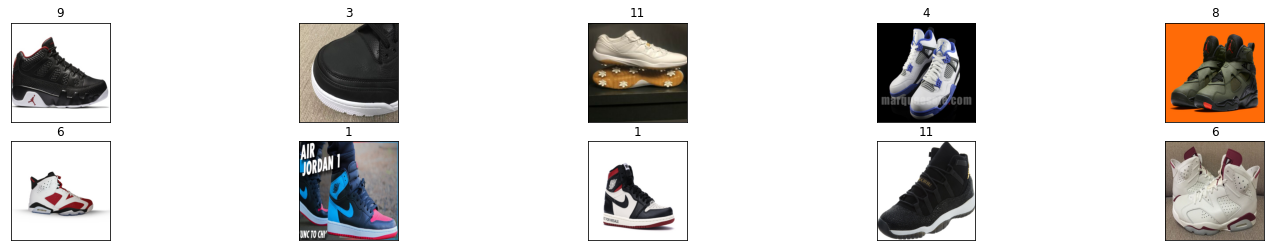

In [ ]:
dataiter = iter(train_loader)

images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
      ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      ax.set_title(classes[labels[idx]])

In [ ]:
#Not using AlexNet currently
#AlexNet Implementation
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent

# alexnet
import torchvision.models

torch.manual_seed(1) # set the random seed


# obtain one batch of training images
dataiter = iter(train_loader8)
images, labels = dataiter.next()

# confirm output from AlexNet feature extraction
alexNet = torchvision.models.alexnet(pretrained=True)
features = alexNet.features(images)
features.shape

NameError: ignored

### Model Building:
Using a CNN: Build a convolutional neural network model that takes the (600x600 RGB) image as input, and predicts the Jordan Model.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

torch.manual_seed(1) # set the random seed

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.name = "Class"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(216090, 50)
        self.fc2 = nn.Linear(50, 21)

    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = self.pool(F.relu(self.conv2(x)))
        #print('x_shape:',x.shape)
        x = x.view(-1, 216090)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
#ADDING MORE LINEAR LAYERS TO THE ABOVE (OG) ARCHITECTURE
#Ran out of memory and CUDA when added more than 3 layers
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

torch.manual_seed(1) # set the random seed

class XtraCNNClassifier(nn.Module):
    def __init__(self):
        super(XtraCNNClassifier, self).__init__()
        self.name = "Class"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(216090, 500)
        self.fc2 = nn.Linear(500, 50)
        self.fc3 = nn.Linear(50, 21)

    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = self.pool(F.relu(self.conv2(x)))
        #print('x_shape:',x.shape)
        x = x.view(-1, 216090)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
Michael= CNNClassifier()

In [ ]:
Mike= XtraCNNClassifier()

Training Code:

In [ ]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    for imgs, labels in data_loader:

       #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, train_loader, val_loader, num_epochs=5, learn_rate = 0.001):

    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)

    iters, train_acc, val_acc = [], [], []

    # training
    print ("Training Started...")
    n = 0 # the number of iterations
    start_time=time.time()
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):


           #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################


            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            n += 1

        # track accuracy
        iters.append(n)
        train_acc.append(get_accuracy(model, train_loader))
        val_acc.append(get_accuracy(model, val_loader))
        print(epoch, train_acc[-1], val_acc[-1])
    end_time= time.time()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()
    return train_acc, val_acc

Training Results:

Below are the results and plots of training with a combination of the two classifiers and multiple batch sizes

CUDA is available!  Training on GPU ...
Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.3794785790516847 0.20270270270270271


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.8720841591706052 0.3890469416785206


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.9789602073486812 0.3911806543385491


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.9951212075011434 0.4096728307254623


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.9963409056258576 0.4089615931721195


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5 0.9946638207043756 0.40540540540540543


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


6 0.9987803018752859 0.4089615931721195


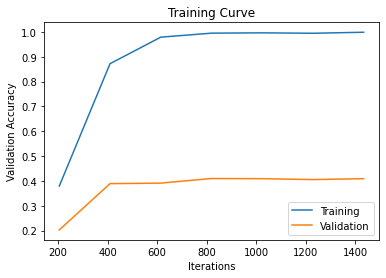

([0.3794785790516847,
  0.8720841591706052,
  0.9789602073486812,
  0.9951212075011434,
  0.9963409056258576,
  0.9946638207043756,
  0.9987803018752859],
 [0.20270270270270271,
  0.3890469416785206,
  0.3911806543385491,
  0.4096728307254623,
  0.4089615931721195,
  0.40540540540540543,
  0.4089615931721195])

In [ ]:
#BATCH SIZE 32, Learning rate 0.0025
use_cuda = True
Michael= CNNClassifier()
#ALNC = alexNet.features

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Michael.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(Michael, train_loader, val_loader, num_epochs=7, learn_rate=0.0025)

CUDA is available!  Training on GPU ...
Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.5747827412715353 0.30938833570412516


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.8841286781521573 0.3762446657183499


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.96051227321238 0.3755334281650071


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.9736240280530569 0.3755334281650071


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.9891751791431621 0.3890469416785206
1595644446.4384205


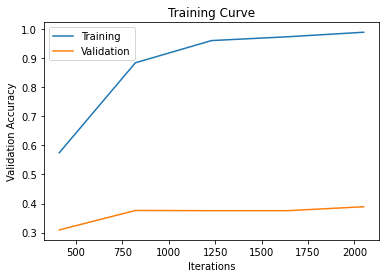

([0.5747827412715353,
  0.8841286781521573,
  0.96051227321238,
  0.9736240280530569,
  0.9891751791431621],
 [0.30938833570412516,
  0.3762446657183499,
  0.3755334281650071,
  0.3755334281650071,
  0.3890469416785206])

In [ ]:
#BATCH SIZE 16, Learning rate 0.0025
use_cuda = True
Michael= CNNClassifier()
#ALNC = alexNet.features

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Michael.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(Michael, train_loader16, val_loader16, num_epochs=5, learn_rate=0.0025)

CUDA is available!  Training on GPU ...
Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.2985211160237841 0.155049786628734


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.6673273364842202 0.24751066856330015


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.8890074706510138 0.317923186344239


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.9528891599329166 0.33783783783783783


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.9652386034456472 0.33783783783783783
1595641710.3319695


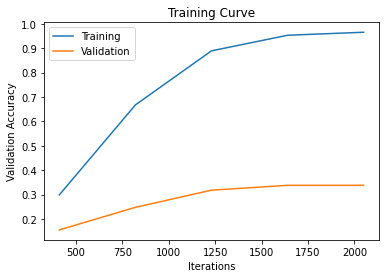

([0.2985211160237841,
  0.6673273364842202,
  0.8890074706510138,
  0.9528891599329166,
  0.9652386034456472],
 [0.155049786628734,
  0.24751066856330015,
  0.317923186344239,
  0.33783783783783783,
  0.33783783783783783])

In [ ]:
#BATCH SIZE 16, Learning rate 0.0025
use_cuda = True
Mike= XtraCNNClassifier()
#ALNC = alexNet.features

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Mike.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(Mike, train_loader16, val_loader16, num_epochs=5, learn_rate=0.0025)

In [ ]:
#BATCH SIZE 16, Learning rate 0.0025
use_cuda = True
Mike= XtraCNNClassifier()
#ALNC = alexNet.features

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Mike.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(Mike, train_loader, val_loader, num_epochs=7, learn_rate=0.0025)

CUDA is available!  Training on GPU ...
Training Started...


RuntimeError: ignored

CUDA is available!  Training on GPU ...
Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.798749809422168 0.7226173541963016


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.8464704985516085 0.7240398293029872


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.9333739899374904 0.7162162162162162


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.9716420186003965 0.7083926031294452


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.986888245159323 0.7147937411095305


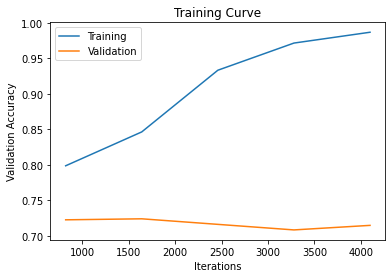

([0.798749809422168,
  0.8464704985516085,
  0.9333739899374904,
  0.9716420186003965,
  0.986888245159323],
 [0.7226173541963016,
  0.7240398293029872,
  0.7162162162162162,
  0.7083926031294452,
  0.7147937411095305])

In [ ]:
#BATCH SIZE 8, Learning rate 0.00025
use_cuda = True
Michael= CNNClassifier()
#ALNC = alexNet.features

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Michael.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model

train(Michael, train_loader8, val_loader8, num_epochs=5, learn_rate=0.00025)

Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.09437414239975606 0.0860597439544808


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.21116023784113433 0.10526315789473684


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.3503582863241348 0.14864864864864866


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.551760939167556 0.17140825035561877


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.7231285256898917 0.17567567567567569


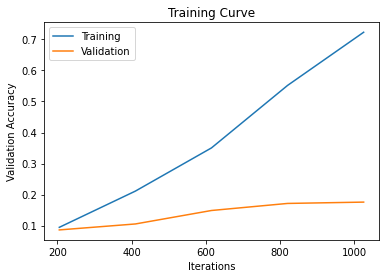

([0.09437414239975606,
  0.21116023784113433,
  0.3503582863241348,
  0.551760939167556,
  0.7231285256898917],
 [0.0860597439544808,
  0.10526315789473684,
  0.14864864864864866,
  0.17140825035561877,
  0.17567567567567569])

In [ ]:
#BATCH SIZE 32, Learning rate 1e-3
use_cuda = True
Michael= CNNClassifier()
train(Michael, train_loader, val_loader, num_epochs=5, learn_rate=0.001)
#Fat overtraining again... oof

CUDA is available!  Training on GPU ...
Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.07653605732581187 0.08677098150782361


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.11983534075316359 0.08890469416785206


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.18463180362860193 0.10668563300142248


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.2579661533770392 0.14722617354196302


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.34776642780911726 0.1301564722617354


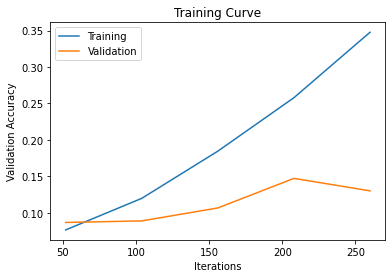

([0.07653605732581187,
  0.11983534075316359,
  0.18463180362860193,
  0.2579661533770392,
  0.34776642780911726],
 [0.08677098150782361,
  0.08890469416785206,
  0.10668563300142248,
  0.14722617354196302,
  0.1301564722617354])

In [ ]:
#BATCH SIZE 128, Learning rate 1e-3
use_cuda = True
Michael= CNNClassifier()
#ALNC = alexNet.features

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Michael.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model

train(Michael, train_loader128, val_loader128, num_epochs=5, learn_rate=0.001)

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

In [ ]:
for img, label in train_loader:
  train_features = alexnet.features(img)
  train_features_tensor = torch.from_numpy(train_features.detach().numpy())
train_features.shape

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


torch.Size([31, 256, 17, 17])

Troubleshooting:
Trying to find the reason, the Michael classifier is overtraining to the training set

In [ ]:
'''
#Training code that returns list of indices of ones model gets wrong
use_cuda=True
def train2(model, train_loader, val_loader, num_epochs=5, learn_rate = 0.001):

    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)

    iters, train_acc, val_acc = [], [], []

    # training
    print ("Training Started...")
    n = 0 # the number of iterations
    start_time=time.time()
    incorrectlist=[]
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):


           #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################


            out = model(imgs)            # forward pass
            pred1= out.max(1, keepdim=True)[1]

            #print("pred:", pred1.reshape((-1,)))
            #print("labels:", labels)
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            n += 1
            incorrects = np.nonzero(pred1.reshape((-1,)) != labels)
            incorrectlist.append(incorrects)
        # track accuracy
        iters.append(n)
        train_acc.append(get_accuracy(model, train_loader))
        val_acc.append(get_accuracy(model, val_loader))
        print(epoch, train_acc[-1], val_acc[-1])
    end_time= time.time()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()
    return train_acc, val_acc, incorrects, incorrectlist
'''

Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.9550236316511663 0.6443812233285917


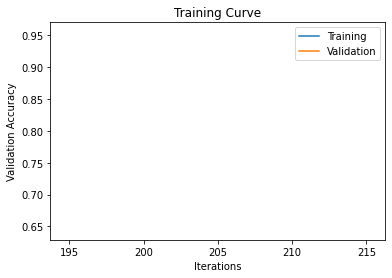

([0.9550236316511663], [0.6443812233285917], tensor([[15],
         [25],
         [26],
         [28]], device='cuda:0'), [tensor([[30]], device='cuda:0'),
  tensor([[7]], device='cuda:0'),
  tensor([], device='cuda:0', size=(0, 1), dtype=torch.int64),
  tensor([[28]], device='cuda:0'),
  tensor([[22]], device='cuda:0'),
  tensor([[18],
          [20]], device='cuda:0'),
  tensor([[12],
          [20],
          [28]], device='cuda:0'),
  tensor([[24]], device='cuda:0'),
  tensor([[24]], device='cuda:0'),
  tensor([[ 1],
          [22],
          [28]], device='cuda:0'),
  tensor([[14]], device='cuda:0'),
  tensor([], device='cuda:0', size=(0, 1), dtype=torch.int64),
  tensor([], device='cuda:0', size=(0, 1), dtype=torch.int64),
  tensor([[ 4],
          [10]], device='cuda:0'),
  tensor([[ 0],
          [26]], device='cuda:0'),
  tensor([[19]], device='cuda:0'),
  tensor([[ 2],
          [24]], device='cuda:0'),
  tensor([], device='cuda:0', size=(0, 1), dtype=torch.int64),
  tensor(

In [ ]:
#train2(Michael,train_loader,val_loader,num_epochs=1)

In [ ]:
#ALTERING THE get_accuracy FUNCTION TO BE ABLE TO PRINT IMAGES INCORRECTLY CLASSIFIED

def get_accuracy2(model, data_loader):
    correct = 0
    total = 0
    wrongly_classified=[]
    rightly_classified=[]
    for imgs, labels in data_loader:
        runningt=correct

       #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        for i in range(len(pred)):
          if (pred[i].reshape((-1,)) != labels[i]):
            wrongly_classified.append([imgs[i], labels[i]])
          if (pred[i].reshape((-1,)) == labels[i]):
            rightly_classified.append([imgs[i], labels[i]])

        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
        ###############NEW ADDITION############

    #wrong_loader = torch.utils.data.DataLoader(wrongly_classified, batch_size=32,
     #                                      num_workers=1, shuffle=True)


    return [(correct / total), wrongly_classified, rightly_classified]

In [ ]:
#Model used was Michael trained with BATCH SIZE 16, Learning rate 0.0025
[acc,wrong,right] = get_accuracy2(Michael, val_loader)
print("Michael Val accuracy:", acc)
print("Wrongly classified:", len(wrong))
print("Rightly classified:", len(right))

RuntimeError: ignored

In [ ]:
wrong_loader= torch.utils.data.DataLoader(wrong, batch_size=32,
                                           num_workers=0, shuffle=True)
right_loader= torch.utils.data.DataLoader(right, batch_size=32,
                                           num_workers=0, shuffle=True)

In [ ]:
#ONES THAT MICHAEL GETS WRONG
#doesnt work with batch size of 1 but worked with 32. No biggie
wrongiter = iter(wrong_loader)
images, labels = wrongiter.next()
images = images.cpu().numpy() # convert images to numpy for display
images = np.squeeze(images)
#print(images[1])
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(32):
      ax = fig.add_subplot(2, 32/2, idx+1, xticks=[], yticks=[])
      #images[idx] = images[0, :,:,:].transpose(1,2,0)
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      #plt.imshow(images[idx])
      ax.set_title(classes[labels[idx]])

RuntimeError: ignored

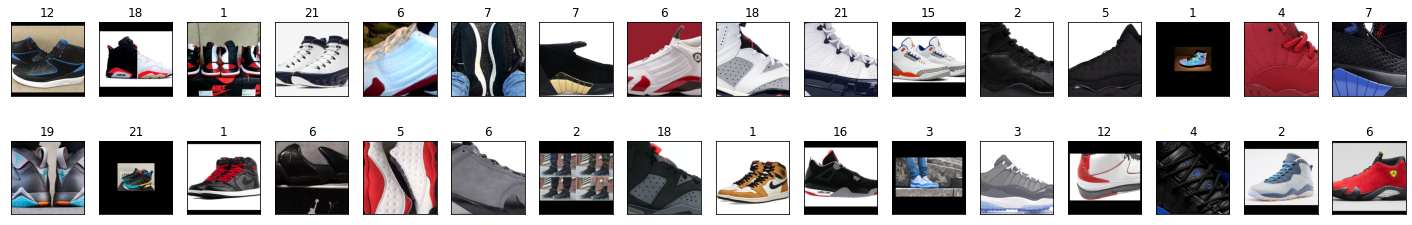

In [ ]:
#ONES THAT MICHAEL GETS RIGHT
#doesnt work with batch size of 1 but worked with 32. No biggie
rightiter = iter(right_loader)
images, labels = rightiter.next()
images = images.cpu().numpy() # convert images to numpy for display
images = np.squeeze(images)
#print(images[1])
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(32):
      ax = fig.add_subplot(2, 32/2, idx+1, xticks=[], yticks=[])
      #images[idx] = images[0, :,:,:].transpose(1,2,0)
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      #plt.imshow(images[idx])
      ax.set_title(classes[labels[idx]])

In [ ]:
[acc,wrong,right] = get_accuracy2(Mike, val_loader16)
print("Mike Val accuracy:", acc)
print("Wrongly classified:", len(wrong))
print("Rightly classified:", len(right))

RuntimeError: ignored

Testing on never seen before data:

One of our group members searched the internet for 30 different shoes all being Jordans between 1-21. These are shoes our model has not seen before.

In [ ]:
!unzip '/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/SHOES(1).zip' -d '/root/testset/'

Archive:  /content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/SHOES(1).zip
   creating: /root/testset/SHOES/
  inflating: /root/testset/SHOES/jordan20.jpg  
  inflating: /root/testset/__MACOSX/SHOES/._jordan20.jpg  
  inflating: /root/testset/SHOES/jordan21.jpg  
  inflating: /root/testset/__MACOSX/SHOES/._jordan21.jpg  
  inflating: /root/testset/SHOES/jordan19.png  
  inflating: /root/testset/__MACOSX/SHOES/._jordan19.png  
  inflating: /root/testset/SHOES/.DS_Store  
  inflating: /root/testset/__MACOSX/SHOES/._.DS_Store  
  inflating: /root/testset/SHOES/extra22.jpg  
  inflating: /root/testset/__MACOSX/SHOES/._extra22.jpg  
  inflating: /root/testset/SHOES/extra23.jpg  
  inflating: /root/testset/__MACOSX/SHOES/._extra23.jpg  
  inflating: /root/testset/SHOES/jordan2.jpeg  
  inflating: /root/testset/__MACOSX/SHOES/._jordan2.jpeg  
  inflating: /root/testset/SHOES/extra30.jpg  
  inflating: /root/testset/__MACOSX/SHOES/._extra30.jpg  
  inflating: /root/testset/SHOES/extra

In [ ]:
test_dir = '/root/testset'
testset = datasets.ImageFolder(test_dir, transform=data_transform)
print('Num images: ', len(testset))

Num images:  60


In [ ]:
indices3=get_working_indices(testset)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
print(indices3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
workingtestset=[]
for i in indices3:
  workingtestset.append(testset[i])

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
for imgs, labels in iter(workingtestset):
#To Enable GPU Usage
  if use_cuda and torch.cuda.is_available():
    imgs = imgs.cuda()
    #labels = labels.cuda()

In [ ]:
def what_jordan(Resized_Tensor, model):
  #output = model(Resized_Tensor)
  Resized_Tensor = np.squeeze(Resized_Tensor)
  '''
  if torch.cuda.is_available():
    model=model.cuda()
    Resised_Tensor= Resized_Tensor.cuda()
  '''
  #print(Resized_Tensor.shape)
  output = model(Resized_Tensor[None, ...])
  #print(output)

  #select index with maximum prediction score
  #add 1 because list index starts from 0 while Jordans start from 1
  pred = output.max(1, keepdim=True)[1]
  #print(pred)
  return pred

In [ ]:
Michaelcpu= Michael.cpu()
predictions=[]
for i in range(len(workingtestset)):
  #workingtestset[i][0]= (workingtestset[i][0]).cuda()
  predictions.append(what_jordan(workingtestset[i][0], Michaelcpu).item())


In [ ]:
#Fixing the wrong order of the tensors corresponding to the shoes
for i in range(len(predictions)):
  if predictions[i]==0:
    predictions[i]=1
  elif predictions[i]==1:
    predictions[i]=10
  elif predictions[i]==2:
    predictions[i]=11
  elif predictions[i]==3:
    predictions[i]=12
  elif predictions[i]==4:
    predictions[i]=13
  elif predictions[i]==5:
    predictions[i]=14
  elif predictions[i]==6:
    predictions[i]=15
  elif predictions[i]==7:
    predictions[i]=16
  elif predictions[i]==8:
    predictions[i]=17
  elif predictions[i]==9:
    predictions[i]=18
  elif predictions[i]==10:
    predictions[i]=19
  elif predictions[i]==11:
    predictions[i]=2
  elif predictions[i]==12:
    predictions[i]=20
  elif predictions[i]==13:
    predictions[i]=21
  elif predictions[i]==14:
    predictions[i]=3
  elif predictions[i]==15:
    predictions[i]=4
  elif predictions[i]==16:
    predictions[i]=5
  elif predictions[i]==17:
    predictions[i]=6
  elif predictions[i]==18:
    predictions[i]=7
  elif predictions[i]==19:
    predictions[i]=8
  elif predictions[i]==20:
    predictions[i]=9

In [ ]:
predictiontestset=[]
for i in range(len(workingtestset)):
  minituple=(workingtestset[i][0],predictions[i])
  predictiontestset.append(minituple)

In [ ]:
data_loaderP = torch.utils.data.DataLoader(predictiontestset, batch_size=30,
                                           num_workers=1, shuffle=True)

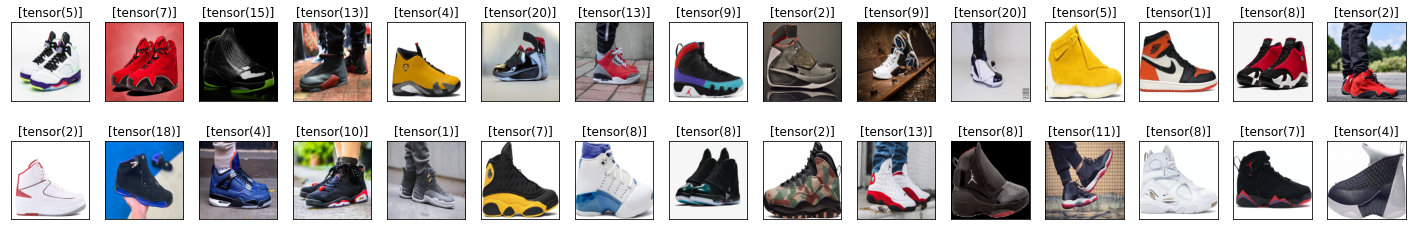

In [ ]:
dataiterP = iter(data_loaderP)

images, labels = dataiterP.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(30):
      ax = fig.add_subplot(2, 30/2, idx+1, xticks=[], yticks=[])
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      ax.set_title([labels[idx]])

#All labels shifted over 1

Since these are unlabeled data, we have to get its accuracy manually based on what we know about each shoe when finding the data.

The model got 11 shoes correct and 19 shoes wrong giving it an accuracy of 47.6 % on unseen data. The model did perform better on the shoes that had more data points in the training set which happen to be the more popular Jordan models. These are Jordans 1-12 which the model classified 8/12 (67%) correctly.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
indices1=get_working_indices(dataset)
Alex_sampler = SubsetRandomSampler(indices1)


In [ ]:
# Save Features to Folder (assumes code from 1. has been evaluated)

import os
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

# location on Google Drive
master_path = '/root/datasets'

# Prepare Dataloader (requires code from 1.)
batch_size = 1 # save 1 file at a time, hence batch_size = 1
num_workers = 1
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           num_workers=num_workers, sampler = Alex_sampler)

classes = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
           '20', '21', '3', '4', '5', '6', '7', '8', '9']

# save features to folder as tensors
n = 0

for img, label in data_loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = master_path + '/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n += 1

RuntimeError: ignored

In [ ]:
# Load Tensor Files (features) from folder

#load features
# location on Google Drive
master_path = '/root/datasets'
dataset = torchvision.datasets.DatasetFolder(master_path, loader=torch.load, extensions=('.tensor'))

# Prepare Dataloader
batch_size = 32
num_workers = 1
feature_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)

# Verification Step - obtain one batch of features
dataiter = iter(feature_loader)
features, labels = dataiter.next()
print(features.shape)
print(labels.shape)

#features are "inputs" to neural network
#"labels" are the output

#32 is batch size, 256 is number of filters
#6x6 is dimension of feature map

torch.Size([32, 256, 17, 17])
torch.Size([32])


In [ ]:

AJ_1 = []
AJ_10 = []
AJ_11 = []
AJ_12 = []
AJ_13 = []
AJ_14 = []
AJ_15 = []
AJ_16 = []
AJ_17 = []
AJ_18 = []
AJ_19 = []
AJ_2 = []
AJ_20 = []
AJ_21 = []
AJ_3 = []
AJ_4 = []
AJ_5 = []
AJ_6 = []
AJ_7 = []
AJ_8 = []
AJ_9 = []



In [ ]:


for i in dataset:
  if i[1] == 0:
    AJ_1.append(i)
  elif i[1] == 1:
    AJ_10.append(i)
  elif i[1] == 2:
    AJ_11.append(i)
  elif i[1] == 3:
    AJ_12.append(i)
  elif i[1] == 4:
    AJ_13.append(i)
  elif i[1] == 5:
    AJ_14.append(i)
  elif i[1] == 6:
    AJ_15.append(i)
  elif i[1] == 7:
    AJ_16.append(i)
  elif i[1] == 8:
    AJ_17.append(i)
  elif i[1] == 9:
    AJ_18.append(i)
  elif i[1] == 10:
    AJ_19.append(i)
  elif i[1] == 11:
    AJ_2.append(i)
  elif i[1] == 12:
    AJ_20.append(i)
  elif i[1] == 13:
    AJ_21.append(i)
  elif i[1] == 14:
    AJ_3.append(i)
  elif i[1] == 15:
    AJ_4.append(i)
  elif i[1] == 16:
    AJ_5.append(i)
  elif i[1] == 17:
    AJ_6.append(i)
  elif i[1] == 18:
    AJ_7.append(i)
  elif i[1] == 19:
    AJ_8.append(i)
  elif i[1] == 20:
    AJ_9.append(i)

AJ_datasets = [AJ_1, AJ_10, AJ_11, AJ_12, AJ_13, AJ_14, AJ_15, AJ_16, AJ_17, AJ_18, AJ_19, AJ_2, AJ_20, AJ_21, AJ_3, AJ_4, AJ_5, AJ_6, AJ_7, AJ_8, AJ_9]

In [ ]:
# Split data into training, validation, and test sets
AJ_trainset=[]
AJ_valset=[]
AJ_testset=[]

for i in AJ_datasets:
  split_1 = int(len(i) * 0.75) #split at 75% for training
  split_2 = int(len(i) * 0.9) #reserve 15% for validation and 10% for testing (we will have additional testing data later)
  train, val, test = i[:split_1], i[split_1:split_2], i[split_2:]
  #add each element of divided dataset to their corresponding stage
  AJ_trainset.extend(train)
  AJ_valset.extend(val)
  AJ_testset.extend(test)

In [ ]:
# Data loaders for the three preprocessed datasets
batch_size = 27
num_workers = 1
AJ_train_loader = torch.utils.data.DataLoader(AJ_trainset,batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
AJ_val_loader = torch.utils.data.DataLoader(AJ_valset, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
AJ_test_loader = torch.utils.data.DataLoader(AJ_testset, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)

In [ ]:
# features = ... load precomputed alexnet.features(img) ...
output = model(features)
prob = F.softmax(output)

In [ ]:
# Build neural network that takes AlexNet features as input
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.name = "ANNClassifier"
        #256 is number of filters, 6x6 feature map, 300 is number of hidden units (chosen)
        self.fc1 = nn.Linear(256 * 17 * 17, 32)
        #9 is number of classes
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        x = x.view(-1, 256 * 17 * 17) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
Jordan = ANNClassifier()

TRAIN

In [ ]:
tensor = torch.from_numpy(tensor.detach().numpy())

In [ ]:
def get_accuracy(model, train=False):
    if train:
        data_loader = AJ_train_loader
    else:
        data_loader = AJ_val_loader

    correct = 0
    total = 0
    for imgs, labels in data_loader:

        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, train_loader, val_loader, batch_size, num_epochs):

    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    start_time=time.time()
    for epoch in range(num_epochs):
        mini_b=0
        mini_batch_correct = 0
        Mini_batch_total = 0
        for imgs, labels in iter(train_loader):
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            ##### Mini_batch Accuracy ##### We don't compute accuracy on the whole trainig set in every iteration!
            pred = out.max(1, keepdim=True)[1]
            mini_batch_correct = pred.eq(labels.view_as(pred)).sum().item()
            Mini_batch_total = imgs.shape[0]
            train_acc.append((mini_batch_correct / Mini_batch_total))
           ###########################

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            val_acc.append(get_accuracy(model, train = False))  # compute validation accuracy
            n += 1
            mini_b += 1
            print("Iteration: ",n,'Progress: % 6.2f ' % ((epoch * len(train_loader) + mini_b) / (num_epochs * len(train_loader))*100),
                  '%', "Time Elapsed: % 6.2f s " % (time.time()-start_time))

        print ("Epoch %d Finished. " % epoch ,"Time per Epoch: % 6.2f s "% ((time.time()-start_time) / (epoch +1)))

        print("Epoch: ", epoch)
        print("Training Accuracy: ", train_acc[-1])
        print("Validation Accuracy: ", val_acc[-1])

    end_time= time.time()
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    train_acc.append(get_accuracy(model, train = True)) # compute training accuracy
    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print ("Total time:  % 6.2f s  Time per Epoch: % 6.2f s " % ( (end_time-start_time), ((end_time-start_time) / num_epochs) ))

In [ ]:
use_cuda = True

ALNC = alexnet.features

# send both to use GPU
if use_cuda and torch.cuda.is_available():
  ALNC.cuda()
  Jordan.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model

train(Jordan, AJ_train_loader, AJ_val_loader, batch_size= 1, num_epochs = 10)

CUDA is available!  Training on GPU ...


RuntimeError: ignored